(이 글은 데이터 수집에서 시각화에에 이르는 전체 진행과정을 진행하는 워크샵을 위해 작성된 글이다. 독자가 파이썬, pandas, Jupyter Notebook, Matplotlib 등에 어느 정도 지식이 있다는 가정하에 쓰여졌다)

## 시가총액
상장기업의 시가총액 데이터를 분석해 보고자 한다. 

파이썬 pandas와 Jupyter Notebook 환경에서 데이터를 수집, 가공, 분석, 적용하는 각 과정들이 전체적으로 진행해 본다. 분석 데이터는 거래소 홈페이지에 공개된 시가총액 상위/하위 데이터이다. 이 데이터를 수집하여 가공하고, matplotlib으로 시각화하고, 분석해 본다. 덧붙여 온라인 시각화 서비스인 plot.ly로도 구현해 본다. 

시가총액(時價總額, market capitalization)은 주식 값의 총합 즉, `주가 X 발행주식수`이며, 간단히 특정 회사의 경제적 크기를 말한다.

현재(2016년 1분기), 삼성전자의 시가총액은 약 180조원, 한국전력은 약 37조원이다. 단순하게 비교해서 삼성전자는 한국전력보다약 5배 크다고 이야기 할 수있다.

## 상장회사 시가총액 데이터

상장회사에 대한 정보는 [한국거래소](http://marketdata.krx.co.kr) 홈페이지에서 손쉽게 얻을 수 있다. 아래 URL은 특정 날짜의 시가총액 상위 종목을 조회하는 화면이다. 상장 종목 전체의 시가총액 순위를 얻을 수 있다. 덧붙여 중요한 사실은 바로 특정 시점의 모든 종목에 대한 종목과 종목 코드를 얻을 수 있다는 점이다. 다시 말해, 오늘 날짜로 검색하면 현재 시장에서 거래되는 모든 종목의 종목 코드, 종목명, 시가총액 정보를 얻을 수 있다.

http://marketdata.krx.co.kr/contents/MKD/04/0406/04060100/MKD04060100.jsp

위 링크로 바로 접근하거나  메뉴에서 다음과 같은 순서로접근할 수 있다.

시장정보 → 주식 → 순위정보 → 시가총액 상/하위

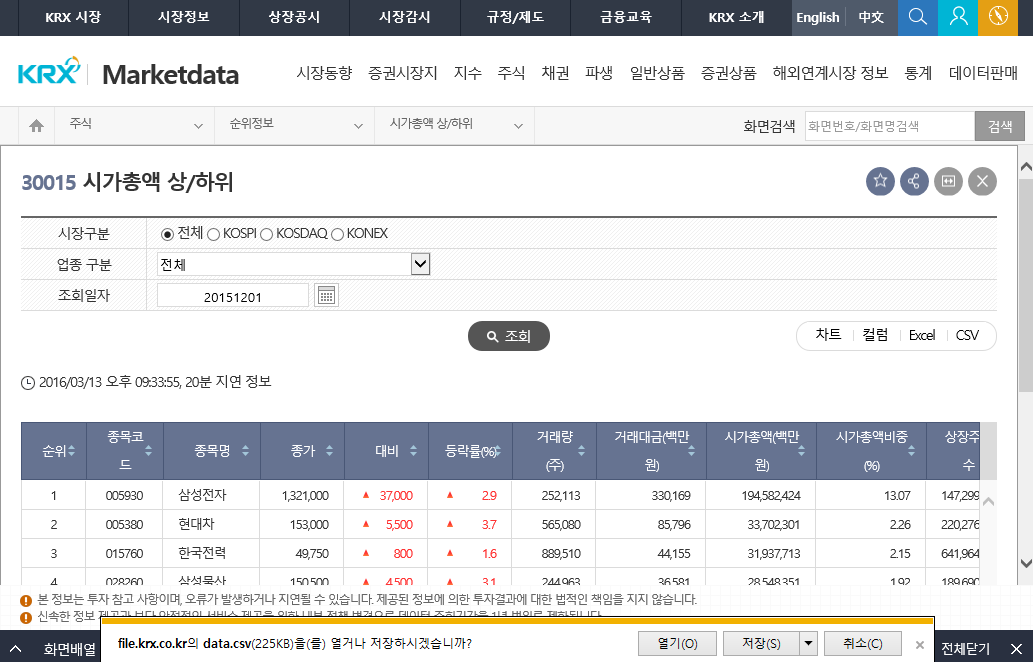

In [4]:
from IPython.display import Image
Image(filename='images/margetdata_marketcap_30015.png') 

시장 구분과 업종 구분은 `전체`로 하고 조회 일자는 현재 날짜로 하거나 조회하고자 하는 년도의 날짜를 입력한다. `CSV`를 선택하면 `data.csv`로 데이터를 내려받을 수 있다.

날짜를 지정할 수 있으므로 매년 특정 시점의 데이터를 얻을 수 있다. 1995년 부터 2015년 까지 12월 초의 하루의 데이터를 내려받아 저장한다. 
저장하는 파일의 이름을 적절하게 바꾸어 준다. 예를 들어, 2015년 데이터라면 data.csv → marcap-2015.csv 로 저장한다. (여기서는 data 라는 하위 폴더를 만들고 여기에 저장하였다)

예를 들어, marcap-2015.csv 파일의 내용은 다음과 같다. 파일의 처음 20 라인을 살펴보자.

In [5]:
! head -20 data/marcap-2015.csv

순위,종목코드,종목명,현재가,대비,등락률,거래량,거래대금,시가총액(백만원),시가총액비중(%),상장주식수(천주),외국인 보유주식수,외국인 지분율(%)
1,005930,삼성전자,"1,295,000","상승 3,000",0.23,"207,148","268,005","190,752,641",13.04,"147,299,337","72,858,065",49.46
2,005380,현대차,"151,500","하락 1,500",-0.98,"697,842","106,227","33,371,887",2.28,"220,276,479","96,759,116",43.93
3,015760,한국전력,"50,300",상승 350,0.70,"1,079,479","54,193","32,290,793",2.21,"641,964,077","204,358,747",31.83
4,028260,삼성물산,"147,500","하락 1,000",-0.67,"278,739","41,335","27,979,281",1.91,"189,690,043","18,689,887",9.85
5,005935,삼성전자우,"1,090,000","상승 5,000",0.46,"44,463","48,372","24,888,435",1.70,"22,833,427","17,276,502",75.66
6,012330,현대모비스,"250,500","하락 3,000",-1.18,"115,569","28,969","24,384,638",1.67,"97,343,863","49,270,829",50.62
7,090430,아모레퍼시픽,"414,500",상승 500,0.12,"57,752","23,907","24,231,044",1.66,"58,458,490","18,104,549",30.97
8,000660,SK하이닉스,"32,700",상승 500,1.55,"5,331,047","174,046","23,805,677",1.63,"728,002,365","341,746,550",46.94
9,051910,LG화학,"339,500","상승 6,500"

각 파일들의 라인 수를 세어보자.

In [6]:
! wc -l data/marcap-20*.csv

   1518 data/marcap-2000.csv
   1617 data/marcap-2001.csv
   1718 data/marcap-2002.csv
   1751 data/marcap-2003.csv
   1752 data/marcap-2004.csv
   1790 data/marcap-2005.csv
   1861 data/marcap-2006.csv
   1942 data/marcap-2007.csv
   1978 data/marcap-2008.csv
   1962 data/marcap-2009.csv
   1963 data/marcap-2010.csv
   1975 data/marcap-2011.csv
   1941 data/marcap-2012.csv
   1978 data/marcap-2013.csv
   2036 data/marcap-2014.csv
   2134 data/marcap-2015.csv
  29916 total


하나의 파일이 대략 1100~2200 라인 정도가 된다. 이 라인 수는 해당 년도의 상장된 상장종목 개수와 같다. (CSV의 헤더가 있으므로 좀 더 정확하게는 `상장종목수 - 1`이 될 것이다)

## 파이썬 pandas로 CSV 파일 처리

저정한 CSV 파일들을 읽고 필요한 가공을 하여 모두 합쳐 하나의 CSV 파일로 저장하고자 한다. 

이 과정을 개발하기 위해 시험삼아 먼저 파이썬 pandas에서 CSV 파일을 읽어본다.

In [7]:
import pandas as pd

In [12]:
df = pd.read_csv( 'data/marcap-2015.csv')
df[['종목코드', '종목명', '시가총액(백만원)','시가총액비중(%)']].head(10)

,종목코드,종목명,시가총액(백만원),시가총액비중(%)
0,005930,삼성전자,"190,752,641",13.04
1,005380,현대차,"33,371,887",2.28
2,015760,한국전력,"32,290,793",2.21
3,028260,삼성물산,"27,979,281",1.91
4,005935,삼성전자우,"24,888,435",1.70
5,012330,현대모비스,"24,384,638",1.67
6,090430,아모레퍼시픽,"24,231,044",1.66
7,000660,SK하이닉스,"23,805,677",1.63
8,051910,LG화학,"22,499,038",1.54
9,032830,삼성생명,"21,900,000",1.50


In [6]:
len(df)

2133

로우(row)수는 `2133`개이다. 즉, 2015년 12월 기준으로 거래소에는 `2133`개 종목이 상장되어 거래가 되고 있다는 이야기이기도 하다.
거래되는 종목 수(2133)는 우선주를 포함하기 때문에 상장된 기업의 수와 동일하지는 않다. 2015년 기준으로 상장기업의 수는 1,900개가 조금 넘는다.

CSV 혹은 엑셀파일을 읽을 때 종종 하게 되는 작업 중의 하나가 데이터 전처리 하는 것이다. 
가장 흔한 사례중의 하나가, 숫자를 표현할 때 쓰는 컴마(',')를 없애는 작업이다. 현재가 컬럼 `df['현재가']`, `df['거래량']`등 콤마(',')가 포함된 컬럼의 데이터 타입은 정수값이 아니라 객체(object)이다. 계산을 하기 위해서는 정수값(int)혹은 실수값(float)이어야 한다.

In [7]:
df.dtypes

순위              int64
종목코드           object
종목명            object
현재가            object
대비             object
등락률           float64
거래량            object
거래대금           object
시가총액(백만원)      object
시가총액비중(%)     float64
상장주식수(천주)      object
외국인 보유주식수      object
외국인 지분율(%)    float64
dtype: object

물론, 데이터를 읽은 다음에도 처리가 가능하다. 다음과 같이 특정 컬럼의 데이터에 있는 콤마(',')를 제거하고 타입을 바꿀 수 도 있지만 약간 복잡하다.

In [8]:
s = df['현재가'].str.replace(',', '').astype('int')
s.head()

0    1295000
1     151500
2      50300
3     147500
4    1090000
Name: 현재가, dtype: int64

여기서는 위 코드는 사용하지 않는다. 대신 훨씬 간편한 방법이 있다.
read_csv()로 CSV를 읽을 때 천단위로 콤마(',')를 사용한다는 옵션 thousands 을 지정하면 간편하게 읽어 낼 수 있다
read_csv()에서 특정 필드를 정된 타입으로 읽도록 할 수 있다. '종목코드'를 문자열로 인식하도록  dtype={'종목코드':'str'} 을 옵션으로 지정하였다. 

In [9]:
df = pd.read_csv( 'data/marcap-2015.csv', thousands=',', dtype={'종목코드':'str'})
df.head()

,순위,종목코드,종목명,현재가,대비,등락률,거래량,거래대금,시가총액(백만원),시가총액비중(%),상장주식수(천주),외국인 보유주식수,외국인 지분율(%)
0,1,005930,삼성전자,1295000,"상승 3,000",0.23,207148,268005,190752641,13.04,147299337,72858065,49.46
1,2,005380,현대차,151500,"하락 1,500",-0.98,697842,106227,33371887,2.28,220276479,96759116,43.93
2,3,015760,한국전력,50300,상승 350,0.70,1079479,54193,32290793,2.21,641964077,204358747,31.83
3,4,028260,삼성물산,147500,"하락 1,000",-0.67,278739,41335,27979281,1.91,189690043,18689887,9.85
4,5,005935,삼성전자우,1090000,"상승 5,000",0.46,44463,48372,24888435,1.70,22833427,17276502,75.66


'현재가', '거래량', '거래대금', '시가총액' 등 수치값들이 정수타입(int64)인 것을 확인할 수 있다.

In [10]:
df.dtypes

순위              int64
종목코드           object
종목명            object
현재가             int64
대비             object
등락률           float64
거래량             int64
거래대금            int64
시가총액(백만원)       int64
시가총액비중(%)     float64
상장주식수(천주)       int64
외국인 보유주식수       int64
외국인 지분율(%)    float64
dtype: object

## 컬럼 추출, 이름변경, 추가

순위~외국인 지분율(%) 까지  13개의 컬럼으로 구성되어 있다.

In [11]:
df.columns

Index(['순위', '종목코드', '종목명', '현재가', '대비', '등락률', '거래량', '거래대금', '시가총액(백만원)',
       '시가총액비중(%)', '상장주식수(천주)', '외국인 보유주식수', '외국인 지분율(%)'],
      dtype='object')

13개 컬럼이 모두 필요한 것은 아니므로 필요한 컬럼만 뽑아보자. 주로 시가총액 관련 컬럼만 필요하다.

In [12]:
df = df[['순위', '종목코드', '종목명', '시가총액(백만원)', '시가총액비중(%)']]
df.head()

,순위,종목코드,종목명,시가총액(백만원),시가총액비중(%)
0,1,005930,삼성전자,190752641,13.04
1,2,005380,현대차,33371887,2.28
2,3,015760,한국전력,32290793,2.21
3,4,028260,삼성물산,27979281,1.91
4,5,005935,삼성전자우,24888435,1.70


컬럼의 이름을 바꾸어 준다. (반드시 바꾸어야 하는 것은 아니지만, 일관성을 위해 컬럼 이름을 미리 정해두고 사용하는 것이 좋다)

In [13]:
df.columns = ['rank', 'code', 'corp_name', 'marcap', 'marcap_pct']
df.head()

,rank,code,corp_name,marcap,marcap_pct
0,1,005930,삼성전자,190752641,13.04
1,2,005380,현대차,33371887,2.28
2,3,015760,한국전력,32290793,2.21
3,4,028260,삼성물산,27979281,1.91
4,5,005935,삼성전자우,24888435,1.70


'2015-12-01'란느 날짜를 지정하고 'year'라는 컬럼을 추가한다. 향후, 여러 연도의 데이터를 합칠 때 로우들을 구분하기 위해서이다.

In [14]:
df['year']= pd.to_datetime('2015-12-01')
df.head()

,rank,code,corp_name,marcap,marcap_pct,year
0,1,005930,삼성전자,190752641,13.04,2015-12-01
1,2,005380,현대차,33371887,2.28,2015-12-01
2,3,015760,한국전력,32290793,2.21,2015-12-01
3,4,028260,삼성물산,27979281,1.91,2015-12-01
4,5,005935,삼성전자우,24888435,1.70,2015-12-01


## 단위 바꾸기

시가총액은 단위가 상당히 크다. 거래소 데이터도 백만원 단위인데 이것을 좀 더 쉽게 보기 위해 조 단위로 바꾸어 보자.

In [15]:
df['marcap'] = df['marcap'] / 1000000. # 백(10^6) 단위에서 조(10^12) 단위로 변경
df.head()

,rank,code,corp_name,marcap,marcap_pct,year
0,1,005930,삼성전자,190.752641,13.04,2015-12-01
1,2,005380,현대차,33.371887,2.28,2015-12-01
2,3,015760,한국전력,32.290793,2.21,2015-12-01
3,4,028260,삼성물산,27.979281,1.91,2015-12-01
4,5,005935,삼성전자우,24.888435,1.70,2015-12-01


시가총액 컬럼 df['marcap']을 모두 더하면, 한국 주식시장 시가총액(약 1460조원)이 된다. 

In [16]:
df.marcap.sum()  # 시가총액 전체 (조단위)

1462.515474000006

시가총액 비중 df['marcap_pct'] 의 합은 얼마일까? 당연히 100이 되어야 할 것이다.

In [17]:
df['marcap_pct'].sum()

99.010000000003032

시가총액 비중의 합이 100이 안되는 이유는 대부분의 종목들이 너무 작은 비중을 차지하기 때문이다.
한국 주식시장에서 시가총액 비중이 0.01% 이 넘으려면 대략 1,200등 안에는 들어야 한다. 다시 말해, 전체 종목(2133개)의 대략 절반 정도는 시가총액 비중이 0.01% 가 안된다는 의미이기도 하다.

## 모든 시총 데이터 합치기

다운로드하여 저장했던 CSV 파일들 marcap-1995.csv ~ marcap-2015.csv 을 합쳐서 하나의 파일로 만들어보자. 앞서 CSV 파일을 하나를 읽오, 컬럼 이름을 바꾸고, 날짜 컬럼을 추가하는 등의 작업을 묶어서 하나의 함수 read_marcap(year) 로 만들었다.

marcap-1995.csv 부터 marcap-2015.csv 까지 파일을 차례로 읽어 리스트 dataframes 에 추가하고, pandas.concat() 함수로 모두 합쳐 하나의 DataFrame을 생성한다.

In [18]:
url_tmpl = "data/marcap-%s.csv"

def read_marcap(year):
    df = pd.read_csv( url_tmpl % str(year), dtype={'종목코드':'str'}, thousands=',')
    df = df[['순위', '종목코드', '종목명', '시가총액(백만원)', '시가총액비중(%)']]
    df.columns = ['rank', 'code', 'corp_name', 'marcap', 'marcap_pct']
    df['year']= pd.to_datetime(str(year) +  '-12-01')  # 날짜 "YYYY-12-01" 컬럼으로 추가
    df['marcap'] = df['marcap'] / 1000000.    # 백(10^6) 단위에서 조(10^12) 단위로 변경
    df['marcap_pct'] = df['marcap'] /  df['marcap'].sum()
    return df

dataframes = []
for year in range(1995, 2016):
    dataframes.append( read_marcap(year) )

df_master = pd.concat(dataframes)
df_master.set_index('code', drop=False, inplace=True)
df_master.head()

,rank,code,corp_name,marcap,marcap_pct,year
code,,,,,,
015760,1,015760,한국전력공사,18.994194,0.134566,1995-12-01
005930,2,005930,삼성전자,7.665979,0.054310,1995-12-01
005490,3,005490,포항종합제철,4.760822,0.033728,1995-12-01
017670,4,017670,한국이동통신,3.229820,0.022882,1995-12-01
000200,5,000200,대우중공업,3.019233,0.021390,1995-12-01


## 회사명 동일하게 맞추기

데이터 전처리(preparation) 과정의 거의 마지막 단계이다. 데이터의 내용을 특정한 기준에 따라 전체적으로 변경해야 할 경우가 있다.

'현대차'의 종목코드 '005380'인데 종목명은 "현대차", "현대자동차", "현 대 차"로 공식 회사명이 년도에 따라 약간 다르다.

In [19]:
df_master.ix[df_master['code'] == '005380']

,rank,code,corp_name,marcap,marcap_pct,year
code,,,,,,
005380,13,005380,현대자동차,1.408595,0.009979,1995-12-01
005380,24,005380,현 대 차,0.802618,0.006422,1996-12-01
005380,16,005380,현 대 차,0.750448,0.009614,1997-12-01
005380,24,005380,현 대 차,1.072802,0.007364,1998-12-01
005380,18,005380,현 대 차,3.752473,0.008233,1999-12-01
005380,13,005380,현대차,2.771973,0.010605,2000-12-01
005380,8,005380,현대차,5.893486,0.019138,2001-12-01
005380,7,005380,현대차,6.079711,0.020515,2002-12-01
005380,7,005380,현대차,11.085684,0.028207,2003-12-01


2015년의 종목명을 기준으로 이전의 모든 데이터의 종목명을 업데이트 해보자. 우선 2015년 데이터를 읽는다.

In [20]:
df_2015 = pd.read_csv( 'data/marcap-2015.csv')
df_2015 = df_2015[['순위', '종목코드', '종목명', '시가총액(백만원)', '시가총액비중(%)']]
df_2015.columns = ['rank', 'code', 'corp_name', 'marcap', 'marcap_pct']
df_2015.head()

,rank,code,corp_name,marcap,marcap_pct
0,1,005930,삼성전자,"190,752,641",13.04
1,2,005380,현대차,"33,371,887",2.28
2,3,015760,한국전력,"32,290,793",2.21
3,4,028260,삼성물산,"27,979,281",1.91
4,5,005935,삼성전자우,"24,888,435",1.70


2015년 데이터(df_2015)의 모든 로우(row)를 순회한다.
순회하면서 이전의 모든 종목(df_master)의 종목명 컬럼(corp_name)을 df_2015의 종목명 컬럼((corp_name)값으로 대체한다.

In [21]:
for index, row in df_2015.iterrows():
    df_master.loc[row['code'], 'corp_name'] = row['corp_name']

In [22]:
# 현대차의 종목명이 모두 바꾸었는지 확인

t = df_master.ix[df_master['code'] == '005380']
t.head(10)

,rank,code,corp_name,marcap,marcap_pct,year
code,,,,,,
005380,13,005380,현대차,1.408595,0.009979,1995-12-01
005380,24,005380,현대차,0.802618,0.006422,1996-12-01
005380,16,005380,현대차,0.750448,0.009614,1997-12-01
005380,24,005380,현대차,1.072802,0.007364,1998-12-01
005380,18,005380,현대차,3.752473,0.008233,1999-12-01
005380,13,005380,현대차,2.771973,0.010605,2000-12-01
005380,8,005380,현대차,5.893486,0.019138,2001-12-01
005380,7,005380,현대차,6.079711,0.020515,2002-12-01
005380,7,005380,현대차,11.085684,0.028207,2003-12-01


## csv로 쓰기

이렇게 CSV를 읽어 생성된 DataFrame을 모두 합쳐 df_master 객체를 생성하였다. 간단하게 to_csv()로 저장한다. index=False로 주어 index로 설정된 'code'를 CSV에 저장하지 않도록 하였다.

In [23]:
df_master.to_csv('data/krx-marcap.csv', index=False)

# 데이터 확인

저장된 데이터를 확인해 보자.

In [24]:
# 저장된 krx-marcap.csv 를 읽고, code 컬럼을 인덱스로 지정한다.

df_master = pd.read_csv('data/krx-marcap.csv')
df_master.set_index('code', inplace=True, drop=False)
df_master.head()

,rank,code,corp_name,marcap,marcap_pct,year
code,,,,,,
015760,1,015760,한국전력,18.994194,0.134566,1995-12-01
005930,2,005930,삼성전자,7.665979,0.054310,1995-12-01
005490,3,005490,POSCO,4.760822,0.033728,1995-12-01
017670,4,017670,SK텔레콤,3.229820,0.022882,1995-12-01
000200,5,000200,대우중공업,3.019233,0.021390,1995-12-01


In [25]:
# 컬럼의 타입들

df_master.dtypes

rank            int64
code           object
corp_name      object
marcap        float64
marcap_pct    float64
year           object
dtype: object

In [26]:
# 전체 row 수

len(df_master)

36634

이렇게 해서 한국 거래소에서 연도별 시가총액 데이터를 CSV로 저장하고, 가공하고 하나로 합치는 과정을 살펴 보았다. 데이터를 수집하고 가공하는 절차는 데이터 분석에서 가장 많이 하게되는 작업이다.